Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Munzir H. Abdulmajid"

---

In [73]:
from numpy.testing import assert_, assert_raises, assert_allclose
import numpy as np #import numpy as usual
from numpy import linalg as LA #import linear algebra package for norms, etc.
import matplotlib.pyplot as plt #import plotting package
from simple_plot import *

ME 535 Winter 2021

# Homework 5

__1)__ Using a node-by-node iterative solver, compute the steady state temperature distribution in a plate shaped like an isoceles right triangle; i.e solve Laplace's equation $u_{xx} + u_{yy} = 0$ in the region where $x>0, y>0, x+y < 1$ with Dirichlet boundary conditions: $u(x,0)=0, u(0,y)=y, u(x,1-x)=y$.

__1a)__ Use a uniform grid with $\Delta x = \Delta y = 0.04$ and compute until the maximum change in the value at any node during an update is $< 0.002$. Print the number of updates and plot your resulting temperature distribution.

In [74]:
# function to update each value as mean of neighbors
def mean_update_lowertri(u):
    '''
    update 2D array with non-boundary elements replaced 
    by average of 4 nearest neighbors (on Cartesian grid)
    
    Args:
        u: 2D numpy array of floats
        
    Returns:
        u_new: numpy array with same shape as u
    '''
    # YOUR CODE HERE
    m, n = u.shape
    u_new = u.copy()
    for i in range(0, n - 1):
        for j in range(0, n - 1):
            if i > j and i != 0 and j != 0:
                u_new[i,j] = (u[i+1,j]+u[i-1,j]+u[i,j-1]+u[i,j+1])/4    
    return u_new

In [75]:
# function to construct array with BCs
def make_BC_array(n):
    '''
    create a 2D array with BCs on left, bottom, and main diagonal
    
    Args:
        n: integer size of array
        
    Returns:
        u: nxn float numpy array
    '''
    # YOUR CODE HERE
    u = np.zeros((n, n))
    step = 1/(n - 1)
    for i in range(0, n):
        u[i, i] = i * step
        u[n-1, i] = i * step
    return u

In [76]:
%precision 3
u6 = make_BC_array(6)
assert_(np.allclose(u6,
    np.array([[0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0. ],
       [0. , 0.2, 0.4, 0.6, 0.8, 1. ]])))
u6_1 = mean_update_lowertri(u6)
assert_(np.allclose(u6_1,
                    np.array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.2 , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.15, 0.4 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.6 , 0.  , 0.  ],
       [0.  , 0.05, 0.1 , 0.5 , 0.8 , 0.  ],
       [0.  , 0.2 , 0.4 , 0.6 , 0.8 , 1.  ]])))

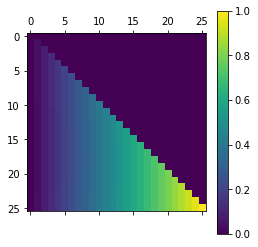

In [77]:
# Set up 26x26 version
# Update until max change < 2.e-3
# Plot solution level sets
# YOUR CODE HERE
u26 = make_BC_array(26)
u26_1 = mean_update_lowertri(u26)
while np.linalg.norm(u26_1 - u26, ord = np.inf) > 0.002:
    u26 = u26_1
    u26_1 = mean_update_lowertri(u26)
    u = u26_1
x, y = np.meshgrid(np.arange(0, 26), np.arange(0, 26), indexing = 'xy')
plt.matshow(u26_1)
plt.colorbar()

__1b)__ What is the value of $u$ at the node that is closest to the centroid of the plate?

In [78]:
# assign solution at node closest to centroid to u_c
u_c = u[9,9]

In [79]:
print(u_c)

0.36


__2)__ The goal for this problem is to implement a finite difference code to solve for the transverse in-plane vibrations of a taut string with given initial displacement and velocity. in other words, your mission is to implement a finite difference solver for the wave equation $\displaystyle{\frac{\partial^2u}{\partial t^2} = c^2 \frac{\partial^2u}{\partial x^2}}$ on $x \in [0,1]$ for $t \in [0, t_F]$ with initial conditions $u(x,0) = x (1-x), u_t(x,0) = 0.1 sin(2 \pi x)$ and fixed end boundary condiditions $u(0,t) = u(1,t) = 0$.

Use a seond order central difference operator for both the space and time derivatives.

Here are the specifics:

__2a)__ Using the typical notation `u[i,j]` $= u_{i,j} = u(x_i, t_j)$, determine an explicit update formula for computing $u_{i,j+1}$.

In [80]:
# YOUR CODE HERE
print('u[i, j + 1] = (a**2)*(u[i + 1, j]) + 2*(1 - a**2)*u[i, j] + (a**2)*u[i - 1, j] - u[i, j - 1]')
print(',where a =(c*dt)/(dx)')

u[i, j + 1] = (a**2)*(u[i + 1, j]) + 2*(1 - a**2)*u[i, j] + (a**2)*u[i - 1, j] - u[i, j - 1]
,where a =(c*dt)/(dx)


__2b)__ Computing the line of values after the first time step (i.e., for $j=1$) using a central difference in time involves the value for $u_{i,-1}$ (which is not given). Use the central difference formula and the initial velocity condition to obtain an approximation for $u_{i,-1}$, and plug that approximation into your explicit update formula to get a formula for computing the first line of vaues $u_{i,1}$ using only your explicit update formula and the initial conditions (for both displacement and velocity). 

In [81]:
# YOUR CODE HERE
print('u_t[i, 0] = g[i, 0]')
print('u[i, 1] = dt*u_t + (1 - a**2)*u[i, 0] + 0.5*(a**2)*(u[i - 1, 0] + u[i + 1, 0])')

u_t[i, 0] = g[i, 0]
u[i, 1] = dt*u_t + (1 - a**2)*u[i, 0] + 0.5*(a**2)*(u[i - 1, 0] + u[i + 1, 0])


__2c)__ Write python code to implement a solver based on your explicit update formula and run your code with the following parameter values:

$c = 1, t_F = 4, \Delta t = 0.01, \Delta x = \frac{1}{50}$

Store your solution in a 2D numpy array `u` and create a 3D plot of your solution.

In [82]:
# solver computes/saves solutions over multiple lines of nodes
# for successive values of t
def wave_solve(f, g, nx, nt, c, dx, dt):
    '''
    compute solution of heat equation by forward euler/central diff.
    
    Args:
        f: 1D numpy array of initial displacements
        g: 1D numpy array of initial velocities
        nx: integer number of gridpoints
        nt: integer number of timesteps
        c: float wave speed
        dx: float grid spacing
        dt: float timestep
        
    Returns:
        u: 2D numpy array of solution values
    '''
    # YOUR CODE HERE

    u = np.zeros([nx, nt])
    a = (c*dt)/(dx)
    u[:, 0] = f
    for i in range(1, nx - 1):
        u[i, 1] = dt*g[i] + (1 - a**2)*u[i, 0] + 0.5*(a**2)*(u[i - 1, 0] + u[i + 1, 0])
    for j in range(1, nt - 1):
        for i in range(1, nx - 1):
            u[i, j + 1] = (a**2)*(u[i + 1, j]) + 2*(1 - a**2)*u[i, j] + (a**2)*u[i - 1, j] - u[i, j - 1]
    return u.T

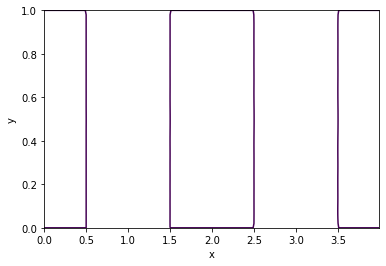

In [83]:
nx = 51
dx = 1./(nx-1)
nt = 400
dt = 0.01
c=1.
x_grid = np.linspace(0.,1.,nx)
f = np.array([x*(1.-x) for x in x_grid]) #np.sin(np.pi*x_grid)
g = 0.1*np.sin(2*np.pi*x_grid)
t_grid = dt * np.array(range(nt))
u = wave_solve(f, g, nx, nt, c, dx, dt)
levels = [0.,0.5]
arraycontourplot(x_grid, t_grid, u.T, levels = levels)

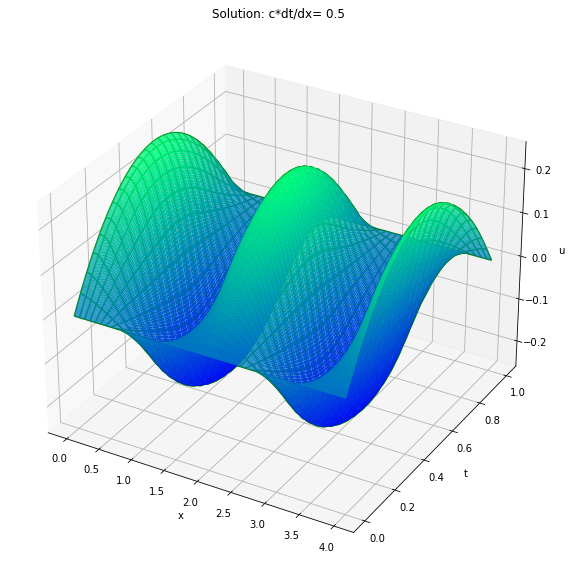

In [84]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
X,Y = np.meshgrid(t_grid, x_grid)
Z = u.T

ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('Solution: c*dt/dx= '+str(c*dt/dx))
plt.show()

__2d)__ Run your code with different stepsizes, and provide a 3D plot of your solution with the smallest timestep that produces noticeable instability.

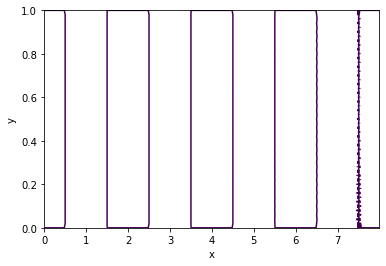

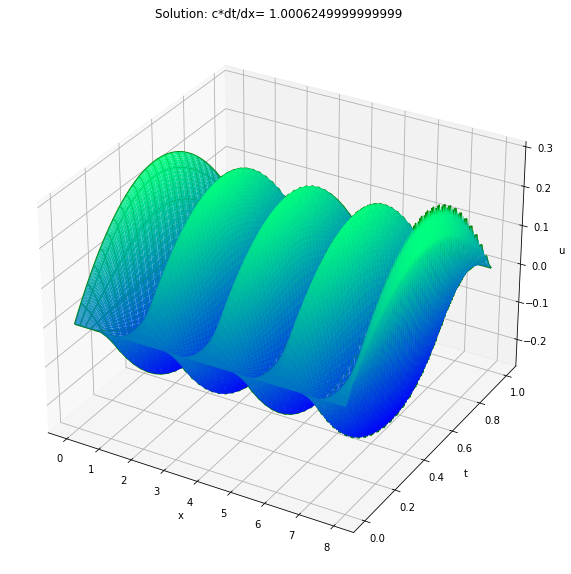

In [85]:
# YOUR CODE HERE
nx = 51
dx = 1./(nx-1)
nt = 400
dt = 0.0200125
c=1.
x_grid = np.linspace(0.,1.,nx)
f = np.array([x*(1.-x) for x in x_grid]) #np.sin(np.pi*x_grid)
g = 0.1*np.sin(2*np.pi*x_grid)
t_grid = dt * np.array(range(nt))
u = wave_solve(f, g, nx, nt, c, dx, dt)
levels = [0.,0.5]
arraycontourplot(x_grid, t_grid, u.T, levels = levels)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
X,Y = np.meshgrid(t_grid, x_grid)
Z = u.T

ax.plot_wireframe(X, Y, Z, color='green')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='winter', edgecolor='none')
ax.set_title('Solution: c*dt/dx= '+str(c*dt/dx))
plt.show()

__2e)__ The Cauchy number for this solver is $c \frac{\Delta t}{\Delta x}$ and the stability limit occurs when the Cauchy number is equal to the CFL number. What is the CFL number for your explicit wave equation solver?

In [86]:
# assign the appropriate value to the variable CFL
# CFL = insert_answer_and_uncomment
CFL = 1
print('CFL =', CFL)

CFL = 1


__3)__ Let's start with an unconstrained optimization problem. Gradient descent involves an update equation of the form:

$$x^{(k+1)} = x^{(k)} + t^{(k)} d^{(k)}$$

where the superscript $(k)$ is the iteration number, $x^{(k)}$ is the current point, $x^{(k+1)}$ is the next point, and $t^{(k)} \text{ and } d^{(k)}$ are the size and direction of the step at iteration $k$.

For gradient descent, the step direction is $-\nabla f(x^{(k)})$ but there is the separate issue of determining how far to step in that direction.

An exact line search uses $t = \text{ argmin}_{t>0} f(x+t d)$; i.e. it involves finding the location of the exact minimum along a line which can be relatively expensive to compute.

A common alternative approach is the __backtracking line search__ (with parameters $\alpha \in(0,1/2), \beta \in (0,1))$. Start at $t=1$, repeat $t=\beta t$ until the following condition is satisfied:

$$f(x^{(k)}+t d^{(k)}) < f(x^{(k)}) + \alpha t \nabla f(x^{(k)})^T d^{(k)}$$

The idea is to start with a "full step" and see if the function value decreased by the desired fraction ($\alpha$) of the decrease in the linear approximation (provided by the the current function value). If not, the step was too big, so reduce the stepsize (by a factor of $\beta$) and repeat until the condition is satisfied. The next iteration point is then provided by the left-hand side of the condition.

__3a)__ Write a python function to implement a backtracking line search.

In [87]:
def backtrack(f,gradf,d,x0,alpha,beta, max_iters):
    """
    compute the next step in gradient descent optimization with backtracking line search
    Args:
        f: objective function
        gradf: function corresponding to gradient of objective function
        d: float initial stepsize
        x0: 1D numpy array of coordinates of current point
        alpha, beta: float parameters in line search
        max_iters: integer limit on backtracking iterations
    """
    # YOUR CODE HERE
    t = 1
    i = 0
    while all(f(x0 + t*d) >= (f(x0) + alpha*t*np.transpose(gradf(x0))*d)):
        i += 1
        t *= beta
        if i == max_iters:
            x = x0 + t*d
            break
    else:
        x = x0 + t*d
    return x

__3b)__ Test your backtracking line search on a 1D example:

$$f(x) = x^2, \; x_0 = 1, \; \alpha = 0.5, \; \beta = 0.6$$

What value do you obtain for the next iterate $x^{(1)}$?

In [88]:
f = lambda x: x[0]**2

gradf = lambda x: np.array([2*x[0]])

alpha = 0.5
beta = 0.6
max_steps = 5
x0 = np.array([1.])

In [89]:
x1 = backtrack(f,gradf,-gradf(x0), x0, alpha, beta, max_steps)
assert_(x1==0.28)

__3c)__ Modify the following python `gradient_descent` code to find new points using either ordinary gradient descent (with fixed stepsize) or backtracking line search:

```
def grad_descent(f, gradf, x0, step, max_steps, tol):
    x = np.zeros([max_steps,2])
    val = np.zeros(max_steps)
    x[0] = x0
    val[0] = f(x[0])
    g = gradf(x[0])
    for i in range(1,max_steps):
        x[i] = x[i-1] - step * g
        val[i] = f(x[i])
        g = gradf(x[i])
        if np.linalg.norm(g)<tol:
            break
    return x,val,i
```



In [90]:
# insert your modified grad_descent code below
def grad_descent(f, gradf, x0, max_steps, tol,
                step=0.1, alpha=0.5,beta=0.6, linesearch=False):
    """
    Compute a sequence of points in a gradient descent minimization
    
    Args:
        f: objective function to be minimized
        gradf: function corresponding to gradient of objective function
        x0: 1D numpy array of coordinates of starting point
        max_steps: integer limit on iterations (and on backtracking iterations)
        tol: float tolerance to terminate based on gradient magnitude
        step: float stepsize
        alpha, beta: float parameters in backtracking linesearch
        linesearch: bool to specify constant stepsize (False) or backtracking line search (True)
    Returns:
        x: 2D float numpy array storing sequence of coordinates in the optimization
        val: 1D float numpy array of objective function values
        i: integer number of iterations
    """
    # YOUR CODE HERE
    if linesearch == False:
        x = np.zeros([max_steps,2])
        val = np.zeros(max_steps)
        x[0] = x0
        val[0] = f(x[0])
        g = gradf(x[0])
        for i in range(1,max_steps):
            x[i] = x[i-1] - step * g
            val[i] = f(x[i])
            g = gradf(x[i])
            if np.linalg.norm(g)<tol:
                break
    else:
        x = np.zeros([max_steps,2])
        val = np.zeros(max_steps)
        x[0] = x0
        val[0] = f(x[0])
        g = gradf(x[0])
        for i in range(1,max_steps):
            x[i] = backtrack(f, gradf, -gradf(x[i - 1]), x[i - 1], alpha, beta, max_steps)
            val[i] = f(x[i])
            g = gradf(x[i])
            if np.linalg.norm(g)<tol:
                break
    return x,val,i

__3d)__ Use your codes from 1a and 1c to find the sequence of backtracking linesearch iterates from $x^{(0)} = (2.5,2.0)$ to the minimum of:

$$f(x_0,x_1) = x_0^2 + 3 x_1^2$$

In [91]:
x0 = np.array([2.5,2.])
max_steps = 6
tol = 1e-2
alpha = 0.5
beta = 0.6
step = 0.1

f = lambda x: x[0]**2+3*x[1]**2

gradf = lambda x: np.array([2*x[0], 6*x[1]])

In [92]:
# compute gradient descent optimization steps
gd=grad_descent(f, gradf, x0, max_steps, tol,
                step=step, alpha=alpha,beta=beta, linesearch=False)

In [93]:
# compute optimization steps with backtracking line search
bt=grad_descent(f, gradf, x0, max_steps, tol,
                step=0.1, alpha=0.5,beta=0.6, linesearch=True)

__3e)__ Use the modified `arraycontourplot` given below to plot your backtracking search iterates together with the level sets of the objective function.

In [94]:
def arraycontourplot(x,xvals, yvals, fvals, levels=[-1000,0], labels=['x','y'], 
    titlestring='', filled=False):
    """
    inputs:
    xvals: a 1d numpy array of values for the first coordinate
    yvals: a 1d numpy array of values for the second coordinate
    fvals: a 2d numpy array of function values on the coordinate grid
    levels: a list of contour values
    vars: a list containing the symbolic variables
    titlestring: a string specifying the plot title
    -----
    product: a contourplot based on the array of function values
    """
    fig = plt.figure()
    X,Y = np.meshgrid(yvals,xvals) #switch for more intuitive format
    if filled==True:
        cp = plt.contourf(X, Y, fvals, levels, hatches=['x','+']) #, linestyles='dashed')
    else:
        cp = plt.contour(X, Y, fvals, levels) #, linestyles='dashed')
    # plt.clabel(cp, inline=True, fontsize=10)
    plt.title(titlestring)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    #plt.axis('square')
    plt.axis('tight')
    plt.plot(x.T[0],x.T[1], marker='o', markersize=10, fillstyle='none', linewidth=2)
    plt.show()
    return cp

n=25
xvals = np.linspace(-3,3,n)
yvals = np.linspace(-3,3,n)
fvals = np.zeros([n,n])
f2 = lambda x,y:x**2+3*y**2
for i in range(n):
    for j in range(n):
        fvals[j,i] =  f2(xvals[i],yvals[j])

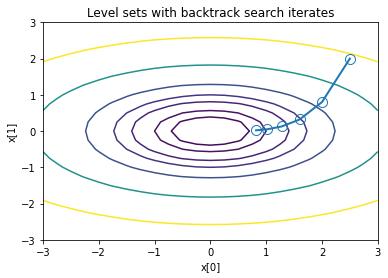

In [95]:
levels=[0,0.5,1,2,3,5,10,20]
arraycontourplot(gd[0],xvals, yvals, fvals, levels, labels=['x[0]','x[1]'], 
    titlestring='Level sets with backtrack search iterates', filled=False)

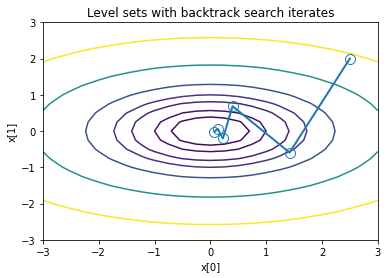

In [96]:
arraycontourplot(bt[0],xvals, yvals, fvals, levels, labels=['x[0]','x[1]'], 
    titlestring='Level sets with backtrack search iterates', filled=False)

Describe your results. Which method gets close to the optimum in fewer iterations? How is the improvement achieved?

Enter your response here.

From the plots, we can see that the ordinary gradient descent method goes slowly towards the optimum whereas the backtracking line search alternates from high to low.
The backtracking line method gets closer to the optimum in fewer iterations and this improvement is achieved because it uses larger steps.